In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from IPython.display import Image
from warnings import filterwarnings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from sklearn import preprocessing 
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay,ConfusionMatrixDisplay
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/vnl-men-2023/VNL2023.csv


In [2]:
vnl=pd.read_csv("/kaggle/input/vnl-men-2023/VNL2023.csv")
df=vnl.copy()

In [3]:
vnl.head(15)
print("-"*100)
vnl.tail(20)

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH
5,Luburic Drazen,Serbia,30,14.33,0.58,1.08,0.00,4.25,0.00,OP
6,Urnaut Tine,Slovenia,35,12.62,0.31,1.38,0.00,5.85,5.00,OH
7,Zhang Jingyin,China,24,13.50,1.83,1.42,0.00,3.42,4.00,OH
8,Souza Alen,Brazil,29,12.46,0.62,0.54,0.00,4.15,0.00,OP
9,Souza Ricardo Lucarelli,Brazil,31,11.85,0.92,1.46,0.15,5.38,3.62,OH


----------------------------------------------------------------------------------------------------


,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
111,Brizard Antoine,France,29,0.89,0.67,0.78,17.33,3.44,0.00,S
112,Wang Hebin,China,24,0.42,0.00,0.33,12.50,2.50,0.17,S
113,Janusz Marcin,Poland,29,0.00,0.14,0.29,17.86,4.00,0.00,S
114,Vadi Mohammad Taher,Iran,34,0.25,0.12,0.00,11.38,2.38,0.00,S
115,Yamamoto Tomohiro,Japan,29,0.00,0.00,0.00,0.00,8.73,4.80,L
116,Kovacic Jani,Slovenia,31,0.00,0.00,0.00,0.00,9.85,6.69,L
117,Danani Santiago,Argentina,28,0.00,0.00,0.00,0.00,8.69,6.15,L
118,Grebennikov Jenia,France,33,0.00,0.00,0.00,0.00,11.44,4.78,L
119,Shoji Erik,USA,34,0.00,0.00,0.00,0.00,5.60,3.80,L
120,Andringa Robbert,Nederland,33,0.00,0.00,0.00,0.00,6.92,3.75,L


# The dataset contains 10 columns with no missing values. All columns, except for age, country, player, and position are of type float. Age is the only column that is an integer, while country, player, and position are of type object.


In [4]:
vnl.info()
print("-"*100)
vnl.isnull().sum()
print("-"*100)
vnl.describe()
print("-"*100)
for col in df.columns:
    print()
    if df[col].dtype == 'object':
        print(f'Name of Column is: {col} and unique values are: {df[col].unique()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    131 non-null    object 
 1   Country   131 non-null    object 
 2   Age       131 non-null    int64  
 3   Attack    131 non-null    float64
 4   Block     131 non-null    float64
 5   Serve     131 non-null    float64
 6   Set       131 non-null    float64
 7   Dig       131 non-null    float64
 8   Receive   131 non-null    float64
 9   Position  131 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 10.4+ KB
----------------------------------------------------------------------------------------------------


Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64

----------------------------------------------------------------------------------------------------


,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


----------------------------------------------------------------------------------------------------

Name of Column is: Player and unique values are: ['Ichikawa Yuki' 'Romano Yuri' 'Abdel-Aziz Nimir' 'Herrera Jaime Jesus'
 'Takahashi Ran' 'Luburic Drazen' 'Urnaut Tine' 'Zhang Jingyin'
 'Souza Alen' 'Souza Ricardo Lucarelli' 'Palonsky Luciano'
 'Lopez Castro Miguel Angel' 'Cebulj Klemen' 'Defalco Torey' 'Mozic Rok'
 'Anderson Matthew' 'Weber Linus' 'Kujundzic Miran ' 'Nishida Yuji'
 'Lima Bruno' 'Maar Stephen Timothy' 'Miyaura Kento'
 'Michieletto Alessandro' 'Nikolov Aleksandar' 'Sclater Ryan Joseph'
 'Vicentin Luciano ' 'Leon Venero Wilfredo' 'Lavia Daniele'
 'Reichert Moritz' 'Loser Agustin' 'Van Garderen Maarten'
 'Atanasov Martin' 'Esmaeilnezhad Amin' 'Jiang Chunan' 'Brehme Anton'
 'Tillie Kevin' 'Clevenot Trevor' 'Yant Herrera Marlon' 'Sharifi Morteza'
 'Hoag Nicholas ' 'Russell Aaron' 'Yu Yuantai' 'Koukartsev Pablo Sergio'
 'Szwarc Arthur ' 'Jaeschkle Thomas ' 'Onodera Taishi'
 

# The analysis includes three categorical columns: Player, Country, and Position. The dependent variable will be Position, which has five unique values. All players in the team can attack. The exception is the libero, who is a back player and cannot serve, block or set.To conduct the VNL onset analysis, we will confidently generate attack, block, and service charts, while excluding liberos.We will create average value charts for attack, block and service due to the large number of players.

In [5]:
fig = px.histogram(vnl, x = 'Age', color = 'Position', barmode = 'overlay')

fig.show()

In [6]:
val=vnl["Position"].value_counts()
n=vnl["Position"].unique()
fig = px.pie(values = val,
             names = n,
             )

fig.show()

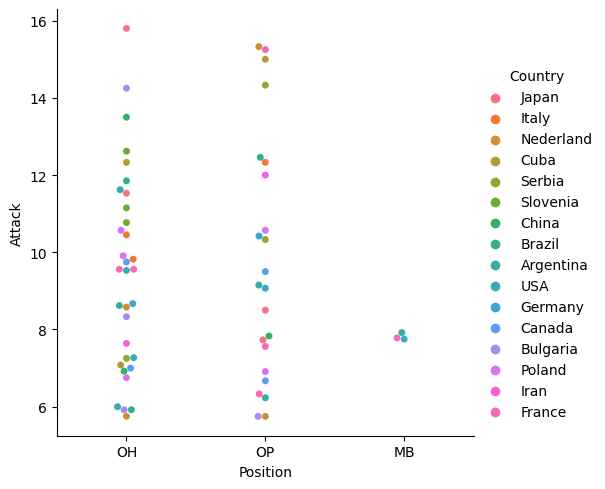

In [7]:
#Attack>=mean
sns.catplot(data=vnl.query("Position != 'L'" and "Attack>=5.642672"), x="Position", y="Attack",hue="Country", kind="swarm")

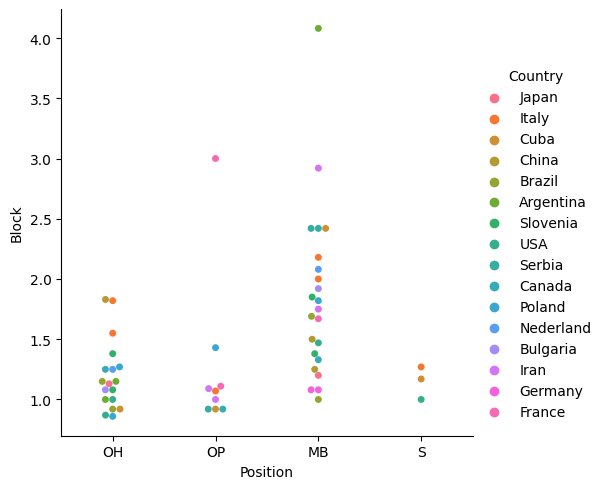

In [8]:
#Block>=mean
sns.catplot(data=vnl.query("Position != 'L'" and "Block>=0.845573"), x="Position", y="Block",hue="Country", kind="swarm")

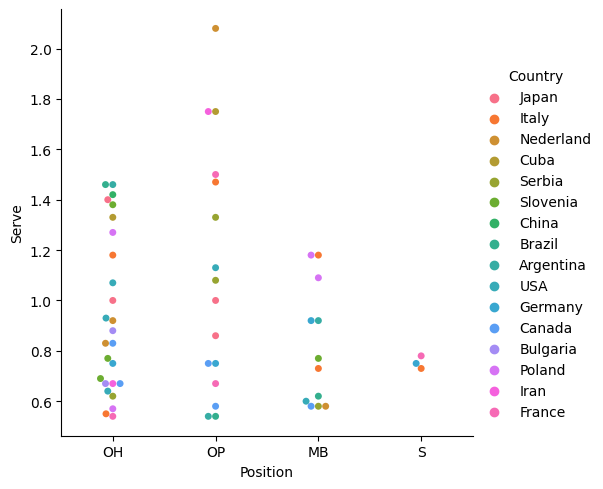

In [9]:
#Serve>=mean
sns.catplot(data=vnl.query("Position != 'L'" and "Serve>=0.535802"), x="Position", y="Serve",hue="Country", kind="swarm")

In [10]:
#Attack>= P%75
fig=px.sunburst(vnl.query("Position != 'L'" and "Attack>=8.600000"),
                  path = ['Position','Country'],
                  color = 'Attack')

fig.show()

In [11]:
#Block>= P%75
fig=px.sunburst(vnl.query("Position != 'L'" and "Block>=1.140000"),
                  path = ['Position','Country'],
                  color = 'Block')
fig.show()

In [12]:
#Serve>= P%75
fig=px.sunburst(vnl.query("Position != 'L'" and "Serve>=0.760000"),
                  path = ['Position','Country'],
                  color = 'Serve')
fig.show()


# **The KNN algorithm is very sensitive to the outliers. We find the outliers.**

In [13]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers


outliers = find_outliers_IQR(vnl["Attack"])
print("Attack number of outliers:" + str(len(outliers)))

print("Attack max outlier value:" + str(outliers.max()))

print("Attack min outlier value:" + str(outliers.min()))

print("-"*50)

outliers = find_outliers_IQR(vnl["Block"])
print("Block number of outliers:" + str(len(outliers)))

print("Block max outlier value:" + str(outliers.max()))

print("Block min outlier value:" + str(outliers.min()))
print("-"*50)

outliers = find_outliers_IQR(vnl["Serve"])
print("Serve number of outliers:" + str(len(outliers)))

print("Serve max outlier value:" + str(outliers.max()))

print("Serve min outlier value:" + str(outliers.min()))
print("-"*50)
outliers = find_outliers_IQR(vnl["Set"])
print("Set number of outliers:" + str(len(outliers)))

print("Set max outlier value:" + str(outliers.max()))

print("Set min outlier value:" + str(outliers.min()))
print("-"*50)
outliers = find_outliers_IQR(vnl["Dig"])
print("Dig number of outliers:" + str(len(outliers)))

print("Dig max outlier value:" + str(outliers.max()))

print("Dig min outlier value:" + str(outliers.min()))
print("-"*50)

outliers = find_outliers_IQR(vnl["Receive"])
print("Receive number of outliers:" + str(len(outliers)))

print("Receive max outlier value:" + str(outliers.max()))

print("Receive min outlier value:" + str(outliers.min()))
print("-"*50)

outliers = find_outliers_IQR(vnl["Age"])
print("Age number of outliers:" + str(len(outliers)))

print("Age max outlier value:" + str(outliers.max()))

print("Age min outlier value:" + str(outliers.min()))

Attack number of outliers:0
Attack max outlier value:nan
Attack min outlier value:nan
--------------------------------------------------
Block number of outliers:6
Block max outlier value:4.08
Block min outlier value:2.42
--------------------------------------------------
Serve number of outliers:3
Serve max outlier value:2.08
Serve min outlier value:1.75
--------------------------------------------------
Set number of outliers:26
Set max outlier value:26.89
Set min outlier value:0.07
--------------------------------------------------
Dig number of outliers:5
Dig max outlier value:11.44
Dig min outlier value:8.69
--------------------------------------------------
Receive number of outliers:0
Receive max outlier value:nan
Receive min outlier value:nan
--------------------------------------------------
Age number of outliers:2
Age max outlier value:41
Age min outlier value:38


In [14]:
def impute_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    upper = df[~(df>(q3+1.5*IQR))].max()
    lower = df[~(df<(q1-1.5*IQR))].min()
    df = np.where(df > upper,
    df.mean(),
    np.where(
    df < lower,
        df.mean(),
        df))
    return df

vnl["Block"] = impute_outliers_IQR(vnl["Block"])
print("Block Describe\n",vnl.describe()["Block"])
print("-"*50)
vnl["Serve"] = impute_outliers_IQR(vnl["Serve"])
print("Serve Describe\n",vnl.describe()["Serve"])
print("-"*50)
vnl["Set"] = impute_outliers_IQR(vnl["Set"])
print("Set Describe\n",vnl.describe()["Set"])
print("-"*50)
vnl["Dig"] = impute_outliers_IQR(vnl["Dig"])
print("Dig Describe\n",vnl.describe()["Dig"])
print("-"*50)
vnl["Age"] = impute_outliers_IQR(vnl["Age"])
print("Age Describe\n",vnl.describe()["Age"])
print("-"*50)

Block Describe
 count    131.000000
mean       0.752545
std        0.525406
min        0.000000
25%        0.370000
50%        0.690000
75%        1.080000
max        2.180000
Name: Block, dtype: float64
--------------------------------------------------
Serve Describe
 count    131.000000
mean       0.505476
std        0.405561
min        0.000000
25%        0.240000
50%        0.420000
75%        0.750000
max        1.500000
Name: Serve, dtype: float64
--------------------------------------------------
Set Describe
 count    131.000000
mean       0.435172
std        0.877875
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.192595
Name: Set, dtype: float64
--------------------------------------------------
Dig Describe
 count    131.000000
mean       3.187420
std        1.639062
min        0.530000
25%        1.920000
50%        3.000000
75%        4.250000
max        7.090000
Name: Dig, dtype: float64
---------------------------------------

In [15]:
vnl['Block']=vnl['Block'].fillna(vnl['Block'].mean())
vnl['Serve']=vnl['Serve'].fillna(vnl['Serve'].mean())
vnl['Set']=vnl['Set'].fillna(vnl['Set'].mean())
vnl['Dig']=vnl['Dig'].fillna(vnl['Dig'].mean())
vnl['Age']=vnl['Age'].fillna(vnl['Age'].mean())

vnl.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.630674,5.642672,0.752545,0.505476,0.435172,3.187420,1.684198
std,3.918599,4.256229,0.525406,0.405561,0.877875,1.639062,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.080000,0.750000,0.000000,4.250000,3.385000
max,37.000000,15.800000,2.180000,1.500000,2.192595,7.090000,6.690000


In [16]:
vnl.drop(["Player"],axis=1,inplace=True)

# **Feature Engineering**

# Encoding 


In [17]:
pos=vnl['Position']
vnl.drop(["Position"],axis=1,inplace=True)

In [18]:
label_encoder = preprocessing.LabelEncoder() 
vnl['Country']= label_encoder.fit_transform(vnl['Country']) 
vnl['Country'].unique() 


array([10,  9, 11,  5, 13, 14,  4,  1,  0, 15,  7,  3,  2, 12,  8,  6])

In [19]:
R=vnl.corr()
round(R,2)

,Country,Age,Attack,Block,Serve,Set,Dig,Receive
Country,1.00,0.28,0.00,0.04,0.12,0.01,0.05,0.03
Age,0.28,1.00,-0.14,-0.15,-0.11,0.14,0.13,-0.02
Attack,0.00,-0.14,1.00,0.37,0.71,-0.20,0.07,0.17
Block,0.04,-0.15,0.37,1.00,0.42,-0.08,-0.29,-0.23
Serve,0.12,-0.11,0.71,0.42,1.00,0.04,0.12,0.10
Set,0.01,0.14,-0.20,-0.08,0.04,1.00,0.25,-0.09
Dig,0.05,0.13,0.07,-0.29,0.12,0.25,1.00,0.51
Receive,0.03,-0.02,0.17,-0.23,0.10,-0.09,0.51,1.00


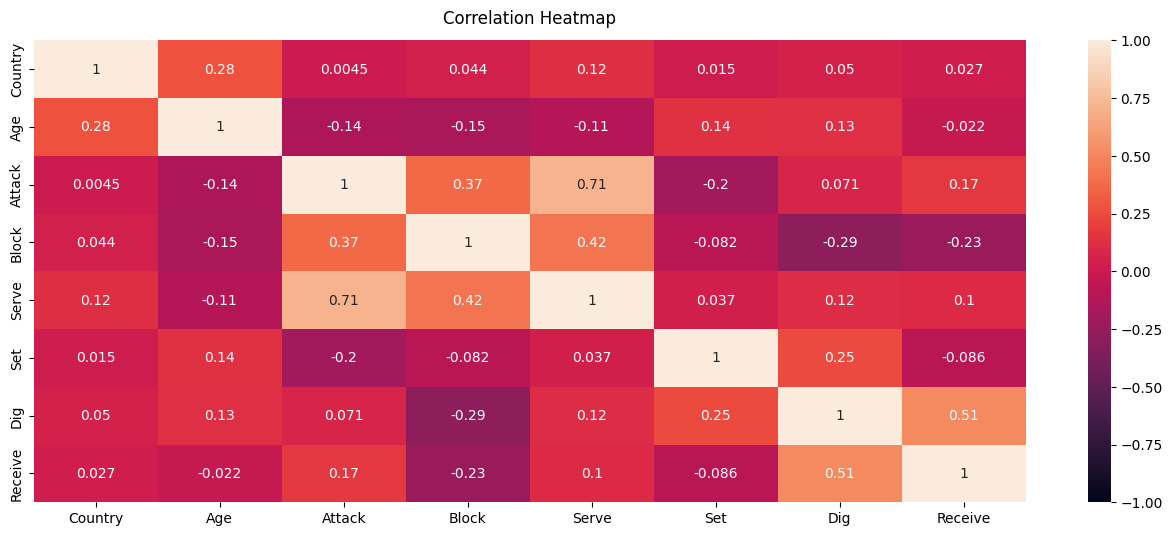

In [20]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(R, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [21]:
X_train,X_test,y_train,y_test=train_test_split(vnl,pos, test_size=0.2,random_state=0)


In [22]:
X_train.shape
X_test.shape

(104, 8)

(27, 8)

In [23]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(27, 5)

# Robust Scaler

In [24]:
scaler = RobustScaler()
X_trains = scaler.fit_transform(X_train)
X_tests = scaler.transform(X_test)


# Principal Component Analysis

In [25]:
pca = PCA(n_components=7)  
X_PCA  = pca.fit_transform(X_trains)  
explained_variance = pca.explained_variance_ratio_ 

print(sum(pca.explained_variance_ratio_)) 

0.9788401601537009


PCA(n_components=0)

PCA(n_components=1)

PCA(n_components=2)

PCA(n_components=3)

PCA(n_components=4)

PCA(n_components=5)

PCA(n_components=6)

PCA(n_components=7)

<Figure size 600x600 with 0 Axes>

Text(0.5, 0, 'n_components')

Text(0, 0.5, 'Explained variance ratio')

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

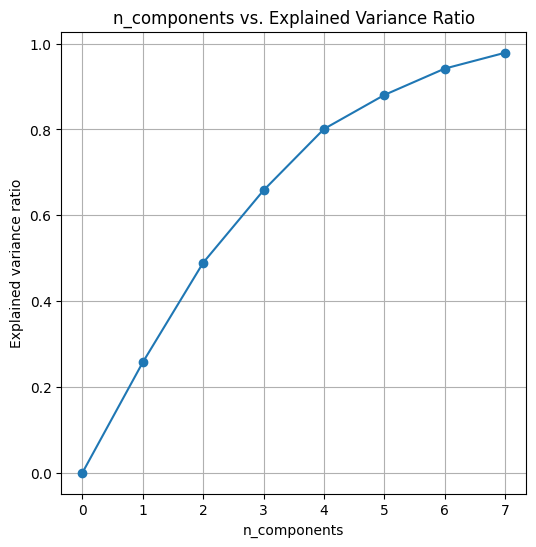

In [26]:
nums=np.arange(8)

var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(X_trains)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(6,6),dpi=100)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

In [27]:
X = pd.DataFrame(data = X_PCA
             , columns = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7'])


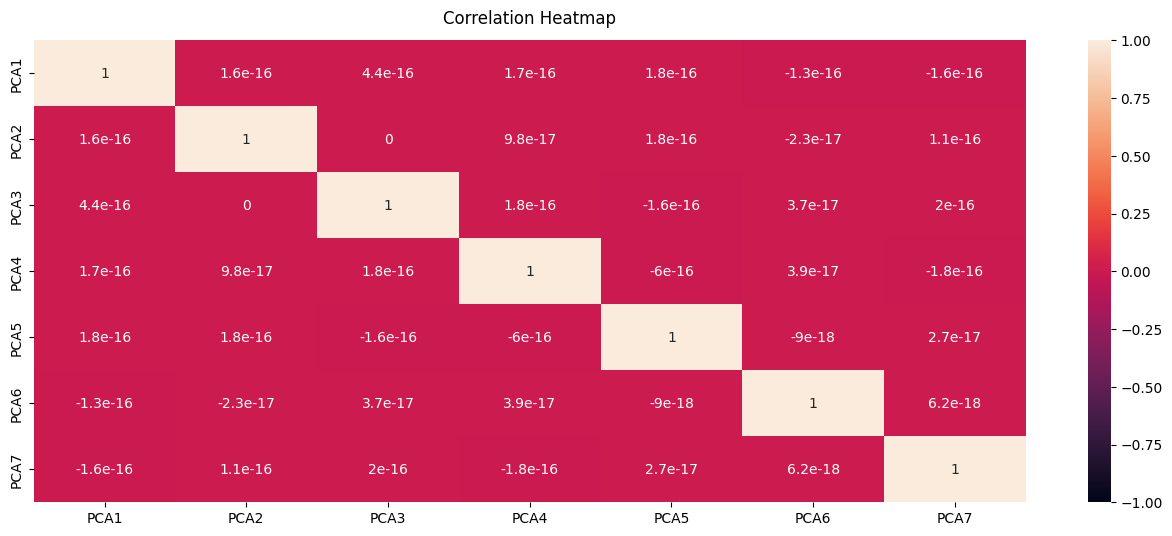

In [28]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# The seven principal components account for 98% of the total variance. Correlation between the components decreases noticeably.

# **KNN Algorithm** 

# The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.Determining the optimal value is our goal, and the number of neighbours is a crucial metric in the KNN algorithm.Overfitting is a common risk associated with this.

In [29]:
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y_train, cv=5)
    scores.append(np.mean(score));

<Axes: >

Text(0.5, 0, 'K Values')

Text(0, 0.5, 'Accuracy Score')

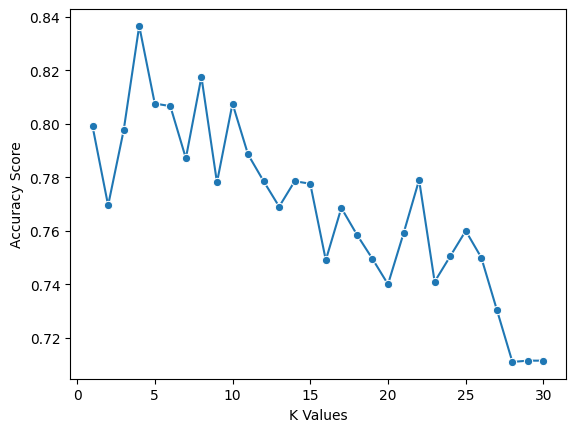

In [30]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [31]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

KNeighborsClassifier(n_neighbors=4)

# **Model Measures**

 # Confusion Matrix

[Text(0, 0, 'L'),
 Text(1, 0, 'MB'),
 Text(2, 0, 'OH'),
 Text(3, 0, 'OP'),
 Text(4, 0, 'S')]

[Text(0, 0, 'L'),
 Text(0, 1, 'MB'),
 Text(0, 2, 'OH'),
 Text(0, 3, 'OP'),
 Text(0, 4, 'S')]

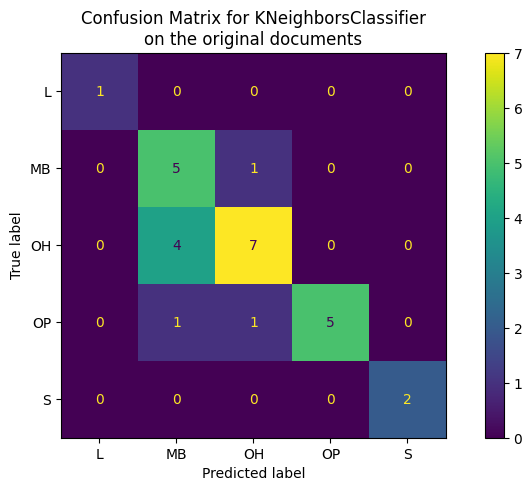

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
ax.xaxis.set_ticklabels(label_binarizer.classes_)
ax.yaxis.set_ticklabels(label_binarizer.classes_)
_ = ax.set_title(
    f"Confusion Matrix for {knn.__class__.__name__}\non the original documents"
)

# **Libero(L)**
* **TP:Libero correctly classified as Libero=1**
* **TN:MB,OH,OP and S correctly classified as MB,OH,OP and S=26**
* **FP:MB,OH,OP and S incorrectly classified as Libero=0**
* **FN:Libero incorrectly classified as MB,OH,OP and S=0**

# **Middle Blocker(MB)**
* **TP:Middle blocker correctly classified as middle blocker=5**
* **TN:L,OH,OP and S correctly classified as L,OH,OP and S=16**
* **FP:L,OH,OP and S incorrectly classified as middle blocker=5**
* **FN:Middle blocker incorrectly classified as L,OH,OP and S=1**

# **Outside Hitter(OH)**
* **TP:Outside hitter correctly classified as outside hitter=7**
* **TN:L,MB,OP and S correctly classified as L,MB,OP and S=14**
* **FP:L,MB,OP and S incorrectly classified as outside hitter=2**
* **FN:Outside hitter incorrectly classified as L,MB,OP and S=4**

# **Opposite(OP)**
* **TP:Opposite correctly classified as opposite=5**
* **TN:L,MB,OH and S correctly classified as L,MB,OH and S=20**
* **FP:L,MB,OH and S incorrectly classified as opposite=0**
* **FN:Opposite incorrectly classified as L,MB,OH and S=2**

# **Setter(S)**
* **TP:Setter correctly classified as Setter=2**
* **TN:L,MB,OH and OP correctly classified as L,MB,OH and OP=25**
* **FP:L,MB,OH and OP incorrectly classified as setter=0**
* **FN:Setter incorrectly classified as L,MB,OH and OP=0**

In [33]:
label_names = label_binarizer.classes_

print(classification_report(y_test, y_pred,target_names=label_names))

              precision    recall  f1-score   support

           L       1.00      1.00      1.00         1
          MB       0.50      0.83      0.62         6
          OH       0.78      0.64      0.70        11
          OP       1.00      0.71      0.83         7
           S       1.00      1.00      1.00         2

    accuracy                           0.74        27
   macro avg       0.86      0.84      0.83        27
weighted avg       0.80      0.74      0.75        27



# **Accuracy**

In [34]:
print("Accuracy:",accuracy_score(y_test, y_pred))


Accuracy: 0.7407407407407407


#  **Precision**

In [35]:
print("None ", metrics.precision_score(y_test, y_pred, average=None))  
print("micro: {:.2f}".format(metrics.precision_score(y_test, y_pred, average='micro')))
print("macro: {:.2f} ".format( metrics.precision_score(y_test, y_pred, average='macro')))
print("weighted: {:.2f} ".format( metrics.precision_score(y_test, y_pred, average='weighted')))

None  [1.         0.5        0.77777778 1.         1.        ]
micro: 0.74
macro: 0.86 
weighted: 0.80 


# **Recall**

In [36]:
print("micro: {:.2f}".format(metrics.recall_score(y_test, y_pred, average='micro')))
print("macro: {:.2f} ".format( metrics.recall_score(y_test, y_pred, average='macro')))
print("weighted: {:.2f} ".format( metrics.recall_score(y_test, y_pred, average='weighted')))

micro: 0.74
macro: 0.84 
weighted: 0.74 


# **F1-Score**

In [37]:
print("micro: {:.2f}".format(metrics.f1_score(y_test, y_pred, average='micro')))
print("macro: {:.2f} ".format( metrics.f1_score(y_test, y_pred, average='macro')))
print("weighted: {:.2f} ".format( metrics.f1_score(y_test, y_pred, average='weighted')))

micro: 0.74
macro: 0.83 
weighted: 0.75 


# **ROC**

# The ROC curve is for binary classification.Since our model is multi-label, it is necessary to create separate ROC curves for each label.

In [38]:
y_score = knn.fit(X_train, y_train).predict_proba(X_test)

(-0.05, 1.05, -0.05, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'One-vs-Rest ROC curves:\nOH vs (OP,S,L,MH)')

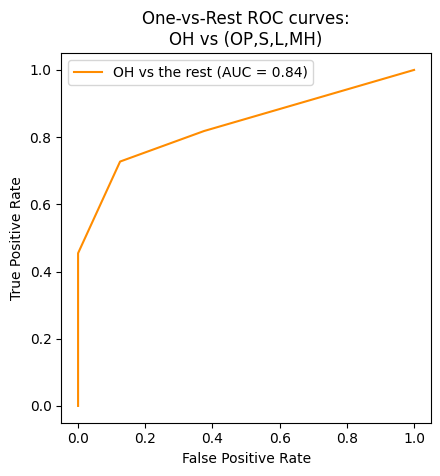

In [39]:
class_of_interest = "OH"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} ",
    color="darkorange",
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nOH vs (OP,S,L,MH)")
plt.legend()
plt.show()

(-0.05, 1.05, -0.05, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'One-vs-Rest ROC curves:\nOP vs (OH,S,L,MH)')

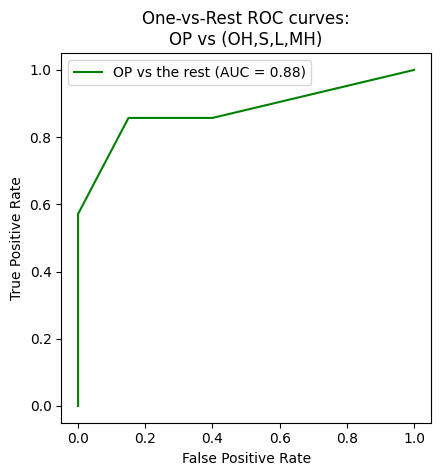

In [40]:
class_of_interest = "OP"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} ",
    color="green",
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nOP vs (OH,S,L,MH)")
plt.legend()
plt.show()

(-0.05, 1.05, -0.05, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'One-vs-Rest ROC curves:\nMB vs (OH,S,L,OP)')

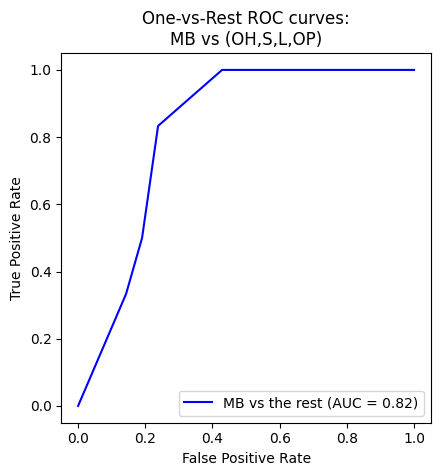

In [41]:
class_of_interest = "MB"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} ",
    color="blue",
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nMB vs (OH,S,L,OP)")
plt.legend()
plt.show()

(-0.05, 1.05, -0.05, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'One-vs-Rest ROC curves:\nS vs (OH,MB,L,OP)')

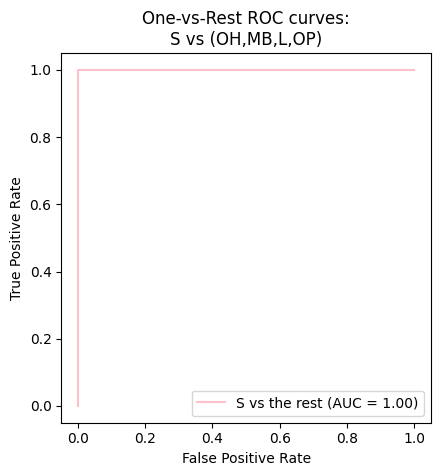

In [42]:
class_of_interest = "S"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} ",
    color="pink",
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nS vs (OH,MB,L,OP)")
plt.legend()
plt.show()

(-0.05, 1.05, -0.05, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'One-vs-Rest ROC curves:\nL vs (OH,MB,S,OP)')

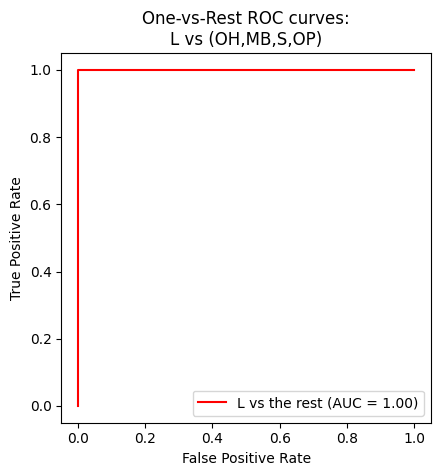

In [43]:
class_of_interest = "L"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} ",
    color="red",
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nL vs (OH,MB,S,OP)")
plt.legend()
plt.show()